In [1]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation

import warnings
warnings.filterwarnings('ignore')

C:\Users\rkbra\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('datasets/heart.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
df['ca'] = np.where(df['ca']=='?',np.nan,df['ca'])
df['thal'] = np.where(df['thal']=='?',np.nan,df['thal'])

In [7]:
df['ca'] = df['ca'].fillna(0)
df['thal'] = df['thal'].fillna(3)

df['ca'] = df['ca'].astype(np.float)
df['thal'] = df['thal'].astype(np.float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## Feature Selection

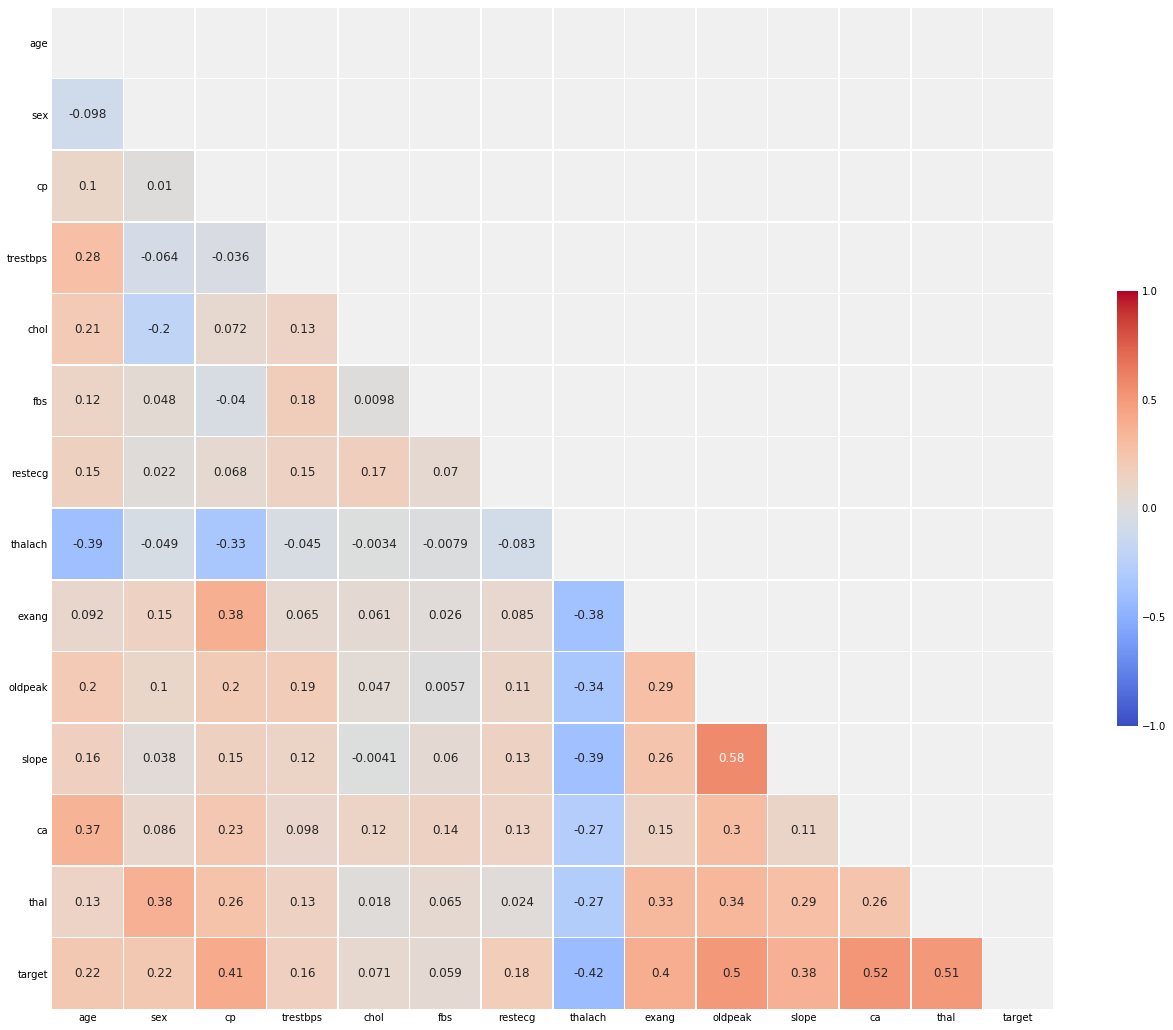

In [10]:
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

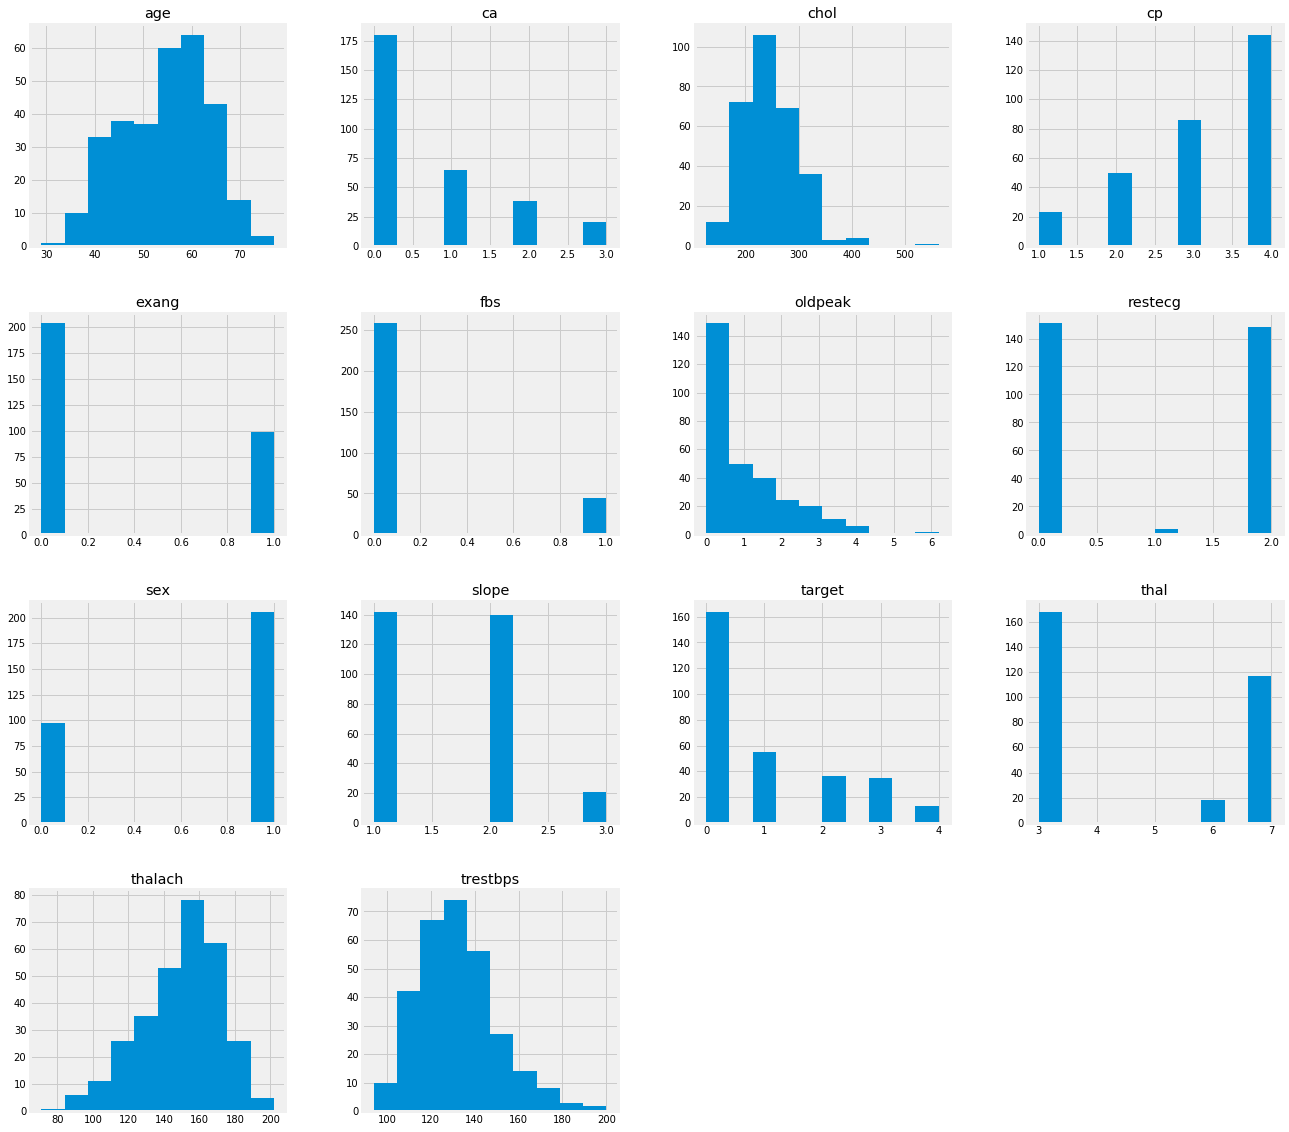

In [11]:
df.hist(figsize=(20,20));

Let's change the column names to be a bit clearer

In [12]:
df.columns = ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol',
              'fasting_blood_sugar','rest_ecg','max_heart_rate_achieved',
              'exercise_induced_angina','st_depression','st_slope','num_major_vessels',
              'thalassemia','target']

I'm also going to change the values of the categorical variables, to improve the interpretation later on,

In [13]:
df['sex'][df['sex']==0] = 'female'
df['sex'][df['sex']==1] = 'male'

df['chest_pain_type'][df['chest_pain_type']==1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type']==2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type']==3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type']==4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar']==0] = 'lower than 120mg/dl'
df['fasting_blood_sugar'][df['fasting_blood_sugar']==1] = 'greater than 120mg/dl'

df['rest_ecg'][df['rest_ecg']==0] = 'normal'
df['rest_ecg'][df['rest_ecg']==1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg']==2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina']==0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina']==1] = 'yes'

df['st_slope'][df['st_slope']==1] = 'upsloping'
df['st_slope'][df['st_slope']==2] = 'flat'
df['st_slope'][df['st_slope']==3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 3] = 'normal'
df['thalassemia'][df['thalassemia'] == 6] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 7] = 'reversable defect'

df['target'] = np.where(df['target']==0,0,1)

In [14]:
df.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63.0,male,typical angina,145.0,233.0,greater than 120mg/dl,left ventricular hypertrophy,150.0,no,2.3,downsloping,0.0,fixed defect,0
1,67.0,male,asymptomatic,160.0,286.0,lower than 120mg/dl,left ventricular hypertrophy,108.0,yes,1.5,flat,3.0,normal,1
2,67.0,male,asymptomatic,120.0,229.0,lower than 120mg/dl,left ventricular hypertrophy,129.0,yes,2.6,flat,2.0,reversable defect,1
3,37.0,male,non-anginal pain,130.0,250.0,lower than 120mg/dl,normal,187.0,no,3.5,downsloping,0.0,normal,0
4,41.0,female,atypical angina,130.0,204.0,lower than 120mg/dl,left ventricular hypertrophy,172.0,no,1.4,upsloping,0.0,normal,0


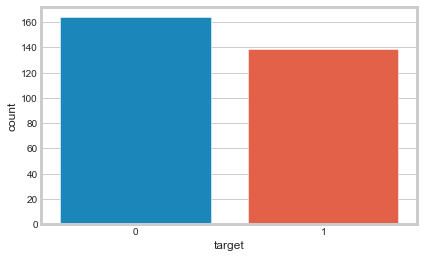

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df)

## Data Preprocessing

### Numerical Features

In [16]:
num_vars = [var for var in df.columns if df[var].dtypes!='O' and var not in ['target']]
num_vars

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels']

#### Discrete Feature

In [17]:
discrete_var = [var for var in num_vars if df[var].nunique()<20]
discrete_var

['num_major_vessels']

#### Continuous Features

In [18]:
continuous_vars = [var for var in num_vars if var not in discrete_var + ['target']]
df[continuous_vars].head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4


### Log Transformation

In [19]:
for var in continuous_vars:
    df[var] = np.log1p(df[var])
    
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,4.158883,male,typical angina,4.983607,5.455321,greater than 120mg/dl,left ventricular hypertrophy,5.017280,no,1.193922,downsloping,0.0,fixed defect,0
1,4.219508,male,asymptomatic,5.081404,5.659482,lower than 120mg/dl,left ventricular hypertrophy,4.691348,yes,0.916291,flat,3.0,normal,1
2,4.219508,male,asymptomatic,4.795791,5.438079,lower than 120mg/dl,left ventricular hypertrophy,4.867534,yes,1.280934,flat,2.0,reversable defect,1
3,3.637586,male,non-anginal pain,4.875197,5.525453,lower than 120mg/dl,normal,5.236442,no,1.504077,downsloping,0.0,normal,0
4,3.737670,female,atypical angina,4.875197,5.323010,lower than 120mg/dl,left ventricular hypertrophy,5.153292,no,0.875469,upsloping,0.0,normal,0


### Categorical Features

In [20]:
cat_vars = [var for var in df.columns if var not in num_vars+['target']]
cat_vars

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'st_slope',
 'thalassemia']

In [21]:
for var in cat_vars:
    print(var, df[var].nunique())

sex 2
chest_pain_type 4
fasting_blood_sugar 2
rest_ecg 3
exercise_induced_angina 2
st_slope 3
thalassemia 3


#### Dummy Variables

In [22]:
df = pd.get_dummies(df, drop_first=True)

In [23]:
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/dl,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,4.158883,4.983607,5.455321,5.017280,1.193922,0.0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,4.219508,5.081404,5.659482,4.691348,0.916291,3.0,1,1,0,0,0,1,1,0,1,1,0,1,0
2,4.219508,4.795791,5.438079,4.867534,1.280934,2.0,1,1,0,0,0,1,1,0,1,1,0,0,1
3,3.637586,4.875197,5.525453,5.236442,1.504077,0.0,0,1,0,1,0,1,0,1,0,0,0,1,0
4,3.737670,4.875197,5.323010,5.153292,0.875469,0.0,0,0,1,0,0,1,1,0,0,0,1,1,0


## Train Test Split

***Data Split 1: no scaling***

In [24]:
y = df['target']
X = df.drop('target', 1)

In [25]:
X.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/dl,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,4.158883,4.983607,5.455321,5.017280,1.193922,0.0,1,0,0,1,0,1,0,0,0,0,0,0
1,4.219508,5.081404,5.659482,4.691348,0.916291,3.0,1,0,0,0,1,1,0,1,1,0,1,0
2,4.219508,4.795791,5.438079,4.867534,1.280934,2.0,1,0,0,0,1,1,0,1,1,0,0,1
3,3.637586,4.875197,5.525453,5.236442,1.504077,0.0,1,0,1,0,1,0,1,0,0,0,1,0
4,3.737670,4.875197,5.323010,5.153292,0.875469,0.0,0,1,0,0,1,1,0,0,0,1,1,0


***Data Split 2: all of our final dataset, with scaling***

In [26]:
sc = StandardScaler()

X2 = sc.fit_transform(X)
y2 = y

## KNNClassififer

In [27]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X2,y2,scoring='roc_auc',cv=10)
    knn_scores.append(np.round(score.mean(), 3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

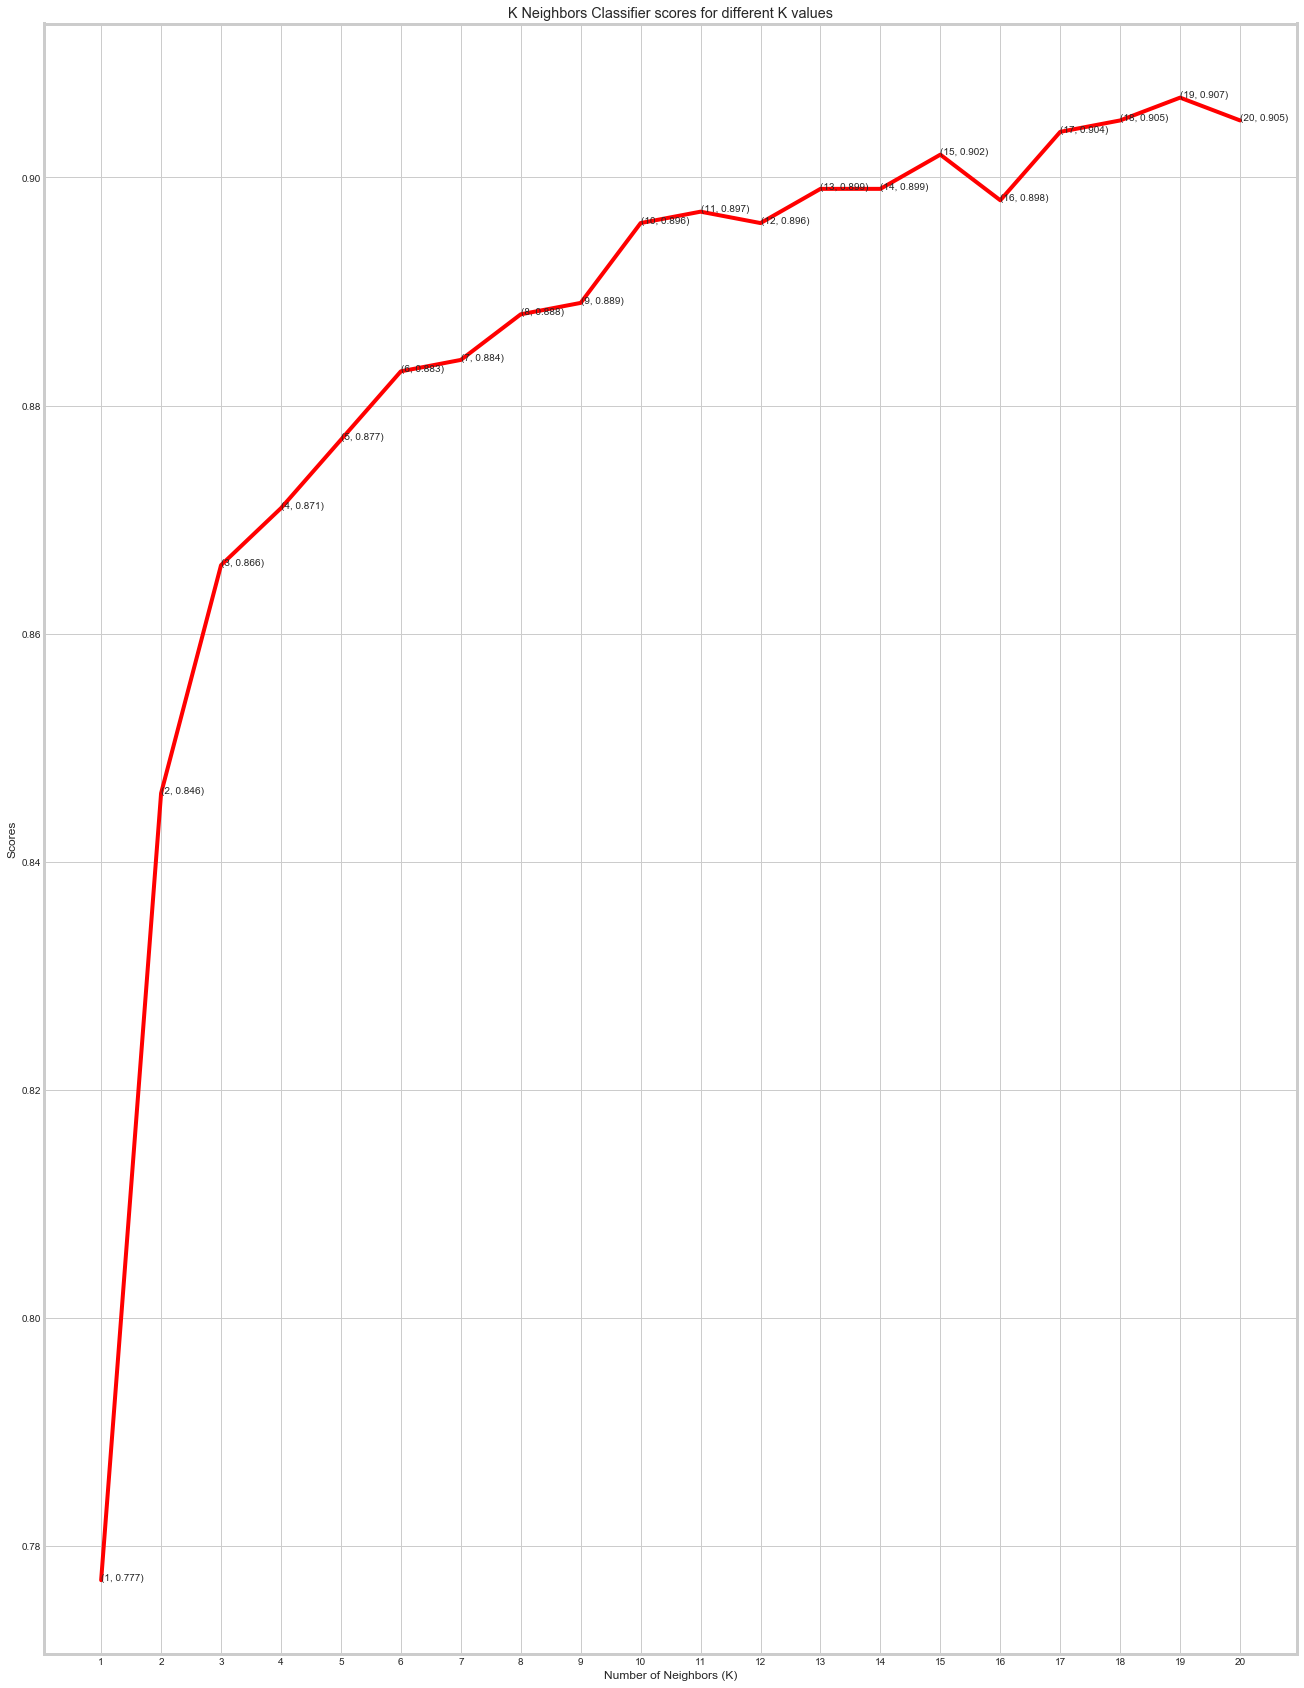

In [28]:
plt.figure(figsize=(20,30))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

## RandomForestClassifier

In [29]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,10,6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [30]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf}

In [31]:
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, scoring='roc_auc')

score = cross_val_score(rf_grid, X, y, scoring='roc_auc')
score.mean()

0.8933474126182459

## Pickle the Model

In [32]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 19))

y = df.target
X = df.drop('target',1)
model = pipeline.fit(X,y)

In [33]:
import joblib

joblib.dump(model, './models/heart.pickle')

['./models/heart.pickle']

In [34]:
model = joblib.load('./models/heart.pickle')

In [35]:
pred_proba = model.predict_proba(X)

In [36]:
pred_proba[:10]

array([[0.73684211, 0.26315789],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.94736842, 0.05263158],
       [0.89473684, 0.10526316],
       [0.89473684, 0.10526316],
       [0.47368421, 0.52631579],
       [0.68421053, 0.31578947],
       [0.05263158, 0.94736842],
       [0.05263158, 0.94736842]])

In [37]:
y[:10]

0    0
1    1
2    1
3    0
4    0
5    0
6    1
7    0
8    1
9    1
Name: target, dtype: int32

In [38]:
df.head(5)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/dl,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,4.158883,4.983607,5.455321,5.017280,1.193922,0.0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,4.219508,5.081404,5.659482,4.691348,0.916291,3.0,1,1,0,0,0,1,1,0,1,1,0,1,0
2,4.219508,4.795791,5.438079,4.867534,1.280934,2.0,1,1,0,0,0,1,1,0,1,1,0,0,1
3,3.637586,4.875197,5.525453,5.236442,1.504077,0.0,0,1,0,1,0,1,0,1,0,0,0,1,0
4,3.737670,4.875197,5.323010,5.153292,0.875469,0.0,0,0,1,0,0,1,1,0,0,0,1,1,0


In [39]:
np.array(X.iloc[4]).reshape(1, -1)

array([[3.73766962, 4.87519732, 5.32300998, 5.15329159, 0.87546874,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        ]])

In [40]:
test_data = {
    "age": 63,
    "sex": "male",
    "chest_pain_type": "typical angina",
    "resting_blood_pressure": 145.0,
    "cholesterol": 233,
    "fasting_blood_sugar": "greater than 120mg/dl",
    "rest_ecg": "left ventricular hypertrophy",
    "max_heart_rate_achieved": 150,
    "exercise_induced_angina": "no",
    "st_depression": 2.3,
    "st_slope": "downsloping",
    "num_major_vessels": 0.0,
    "thalassemia": "fixed defect"
}

test_data

{'age': 63,
 'sex': 'male',
 'chest_pain_type': 'typical angina',
 'resting_blood_pressure': 145.0,
 'cholesterol': 233,
 'fasting_blood_sugar': 'greater than 120mg/dl',
 'rest_ecg': 'left ventricular hypertrophy',
 'max_heart_rate_achieved': 150,
 'exercise_induced_angina': 'no',
 'st_depression': 2.3,
 'st_slope': 'downsloping',
 'num_major_vessels': 0.0,
 'thalassemia': 'fixed defect'}